In [14]:
%matplotlib inline

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
train_data_df = pd.read_csv("/data/datasets/ml/house-prices/train.csv")
train = train_data_df
train_data = train_data_df.copy()

In [17]:
print('Rows     :',train_data_df.shape[0])
print('Columns  :',train_data_df.shape[1])
print('\nFeatures :\n     :',train_data_df.columns.tolist())
print('\nMissing values    :',train_data_df.isnull().values.sum())
print('\nUnique values :  \n',train_data_df.nunique())

Rows     : 1460
Columns  : 81

Features :
     : ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',

In [18]:
print(train_data_df.shape)
train_data_df.tail()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [19]:
train_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Skewness: 1.882876
Kurtosis: 6.536282


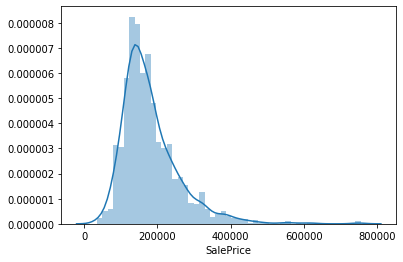

In [20]:
sns.distplot(train_data_df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train_data_df['SalePrice'].skew())
print("Kurtosis: %f" % train_data_df['SalePrice'].kurt())

In [21]:
train_data_df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [22]:
train_data_df.drop("Id", axis=1, inplace=True)

In [23]:
missing_data = train_data_df.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Count": missing_data})
print(missing_data.loc[missing_data["Missing Count"]>0])
missing_column = missing_data.loc[missing_data["Missing Count"]>0].index
print(len(missing_column))
print(missing_column)

              Missing Count
PoolQC                 1453
MiscFeature            1406
Alley                  1369
Fence                  1179
FireplaceQu             690
LotFrontage             259
GarageType               81
GarageCond               81
GarageFinish             81
GarageQual               81
GarageYrBlt              81
BsmtFinType2             38
BsmtExposure             38
BsmtQual                 37
BsmtCond                 37
BsmtFinType1             37
MasVnrArea                8
MasVnrType                8
Electrical                1
19
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')


In [24]:
missing_data.head()

,Missing Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690


In [25]:
for column in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
              'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 
               'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'Utilities'):
    train_data_df[column] = train_data_df[column].fillna('None')

train_data_df['LotFrontage'] = train_data_df['LotFrontage'].fillna(train_data_df['LotFrontage'].median())

for column in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath',
              'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF'):
    train_data_df[column] = train_data_df[column].fillna(0)

for column in ('MSZoning', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Electrical', 'KitchenQual'):
    train_data_df[column] = train_data_df[column].fillna(train_data_df[column].value_counts().index[0])
    
# train_data_df['MSZoning'] = train_data_df['MSZoning'].fillna(train_data_df['MSZoning'].value_counts().index[0])
# train_data_df['Exterior1st'] = train_data_df['Exterior1st'].fillna(train_data_df['Exterior1st'].value_counts().index[0]) 
# train_data_df['Exterior2nd'] = train_data_df['Exterior2nd'].fillna(train_data_df['Exterior2nd'].value_counts().index[0])
# train_data_df['SaleType'] = train_data_df['SaleType'].fillna(train_data_df['SaleType'].value_counts().index[0])
# train_data_df['Electrical'] = train_data_df['Electrical'].fillna(train_data_df['Electrical'].value_counts().index[0])
# train_data_df['KitchenQual'] = train_data_df['KitchenQual'].fillna(train_data_df['KitchenQual'].value_counts().index[0])

train_data_df['Functional'] = train_data_df['Functional'].fillna('typical')

print(train_data_df.shape)
train_data_df.isnull().sum().sort_values(ascending=False)

(1460, 80)


MasVnrType       8
SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
                ..
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
MSSubClass       0
Length: 80, dtype: int64

In [34]:
print(train_data['MSSubClass'][0])
type(train_data['MSSubClass'][0]), type(train_data['YrSold'][0])

60


(numpy.int64, numpy.int64)

In [26]:
train_data_df['MSSubClass'] = train_data_df['MSSubClass'].astype(str)
train_data_df['OverallCond'] = train_data_df['OverallCond'].astype(str)
train_data_df['YearBuilt'] = train_data_df['YearBuilt'].astype(str)
train_data_df['YrSold'] = train_data_df['YrSold'].astype(str)
train_data_df['MoSold'] = train_data_df['MoSold'].astype(str)
train_data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [27]:
train_data_df = pd.get_dummies(train_data_df)
print(train_data_df.shape)

(1460, 778)


In [2]:
train_data_df.head()

NameError: name 'train_data_df' is not defined